In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert2/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert2/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert2/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert2/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,0
1,0
2,4
3,1
4,1
...,...
319,1
320,1
321,0
322,3


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.998549,0.000068,0.000863,0.000459,0.000062,9.999955e-01,5.426520e-09,4.471076e-06,8.753467e-08,1.270542e-08
1,0.997925,0.000096,0.001289,0.000618,0.000071,9.977984e-01,1.814142e-03,3.334837e-04,1.589233e-05,3.809151e-05
2,0.000014,0.997236,0.000049,0.000465,0.002235,4.795177e-05,9.373444e-01,2.491688e-04,6.467983e-04,6.171171e-02
3,0.000128,0.000009,0.993267,0.001085,0.005511,9.789828e-01,1.760667e-04,1.981340e-02,8.790290e-04,1.487126e-04
4,0.998379,0.000066,0.001024,0.000474,0.000058,8.072605e-01,1.655840e-04,1.925220e-01,2.569188e-05,2.613363e-05
5,0.000017,0.996793,0.000055,0.000625,0.002510,1.628207e-04,7.992589e-01,1.344078e-05,1.974041e-01,3.160569e-03
6,0.997789,0.000077,0.001736,0.000321,0.000078,6.341885e-01,7.370179e-06,3.389580e-01,3.710629e-05,2.680906e-02
7,0.995531,0.000190,0.002717,0.001451,0.000111,9.988036e-01,1.165278e-05,1.177719e-03,6.626331e-07,6.322242e-06
8,0.000575,0.000014,0.996910,0.000893,0.001608,3.902319e-01,6.362938e-05,6.055627e-01,6.816430e-07,4.141063e-03
9,0.000758,0.000037,0.018215,0.980649,0.000341,7.808490e-06,1.709751e-06,9.982266e-01,1.463460e-05,1.749215e-03


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.998624,0.000066,0.000796,0.000453,0.000061,1.000000e+00,2.167936e-10,3.090148e-09,1.582206e-08,1.171861e-09
1,0.998055,0.000097,0.001235,0.000535,0.000077,9.997284e-01,1.008236e-05,2.481875e-05,2.064326e-04,3.028083e-05
2,0.000015,0.000363,0.004784,0.000138,0.994700,4.083517e-07,4.874316e-05,2.809004e-06,6.301223e-06,9.999417e-01
3,0.000019,0.996486,0.000061,0.000970,0.002464,4.569807e-05,9.982414e-01,3.682742e-08,1.600877e-03,1.120336e-04
4,0.000015,0.996770,0.000054,0.000544,0.002617,1.334219e-07,9.953972e-01,3.975606e-07,3.639721e-03,9.625185e-04
...,...,...,...,...,...,...,...,...,...,...
319,0.000024,0.994424,0.000092,0.001485,0.003974,1.513961e-07,8.016223e-01,1.566243e-04,1.981919e-01,2.898119e-05
320,0.000020,0.996339,0.000060,0.000871,0.002710,3.983127e-06,9.994248e-01,2.507438e-06,4.596862e-04,1.091317e-04
321,0.995068,0.000179,0.003315,0.001308,0.000131,9.756252e-01,6.463296e-03,1.601235e-02,1.776739e-03,1.223633e-04
322,0.002820,0.000172,0.001718,0.995067,0.000224,1.175704e-06,8.915255e-01,3.640153e-04,1.078815e-01,2.277830e-04


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(324,)
y_train, y_train.shape

(array([0, 0, 4, 1, 1, 3, 3, 1, 4, 0, 0, 2, 4, 0, 0, 3, 1, 2, 2, 4, 2, 1,
        3, 4, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 4, 0, 1, 0, 4, 4, 4, 0, 0, 2,
        3, 0, 3, 4, 0, 0, 1, 2, 1, 1, 3, 3, 2, 0, 3, 0, 0, 2, 1, 0, 4, 1,
        3, 1, 0, 1, 0, 0, 1, 1, 4, 2, 4, 3, 0, 0, 3, 2, 4, 1, 3, 1, 4, 3,
        0, 1, 2, 1, 2, 0, 0, 4, 0, 1, 3, 3, 4, 2, 0, 0, 3, 1, 4, 2, 0, 2,
        0, 0, 4, 3, 2, 1, 1, 0, 3, 2, 0, 3, 0, 4, 1, 1, 0, 4, 0, 4, 4, 2,
        4, 2, 0, 0, 0, 3, 0, 2, 2, 2, 3, 0, 3, 0, 3, 4, 1, 2, 3, 1, 1, 0,
        4, 3, 0, 0, 1, 3, 4, 2, 2, 2, 4, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 4,
        4, 3, 0, 3, 1, 2, 2, 2, 3, 2, 0, 0, 0, 1, 2, 0, 0, 4, 4, 3, 0, 4,
        0, 0, 0, 2, 0, 0, 3, 4, 0, 1, 4, 4, 0, 3, 3, 0, 2, 0, 1, 2, 0, 1,
        1, 0, 0, 0, 2, 3, 1, 1, 4, 3, 3, 1, 0, 3, 0, 0, 1, 3, 0, 1, 3, 3,
        2, 1, 2, 1, 3, 3, 4, 0, 4, 0, 4, 3, 3, 1, 1, 2, 0, 4, 4, 0, 3, 2,
        0, 4, 3, 1, 0, 4, 2, 4, 2, 0, 2, 4, 0, 0, 0, 0, 3, 4, 2, 3, 2, 0,
        3, 4, 4, 4, 4, 0, 2, 2, 0, 1, 

# training machine learning

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial')
LR=model.fit(new_x_train,new_y_train)
predictions = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
predictions

array([0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 3, 0, 0, 0, 4, 2, 0, 2, 0, 0, 0, 1,
       0, 0, 4, 2, 2, 3, 1, 4, 0, 2, 3, 3, 0, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         4
           2       0.86      0.86      0.86         7
           3       0.80      1.00      0.89         4
           4       1.00      0.75      0.86         4

    accuracy                           0.94        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.95      0.94      0.94        36

----accuracy score 94.44444444444444 ----


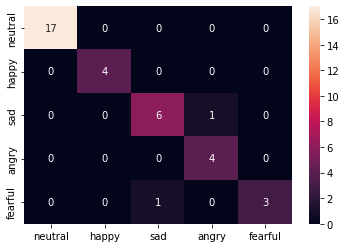

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/savee_fusion_model/LR/expert2'
savedvX = joblib.dump(LR, path)

print("MODEL SAVED")

MODEL SAVED
